ModuleNotFoundError: No module named 'imblearn'

In [135]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Anaconda_Python\python.exe -m pip install --upgrade pip' command.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("loan_dataset_1.csv")

In [3]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,N
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df.shape

(981, 13)

In [6]:
df['Loan_Status'] = df['Loan_Status'].replace('Y','1')
df['Loan_Status'] = df['Loan_Status'].replace('N','0')


TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [98]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,1


In [7]:
df.isnull().sum()


Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
missing = df.isnull().sum()
missing = pd.DataFrame(missing[missing!=0])
missing.columns = ['No. of missing values']
missing['Percentage'] = 100*missing['No. of missing values']/df.Loan_ID.count()
missing.sort_values(by="Percentage", ascending=False)

,No. of missing values,Percentage
Credit_History,79,8.053007
Self_Employed,55,5.606524
LoanAmount,27,2.752294
Dependents,25,2.548420
Gender,24,2.446483
Loan_Amount_Term,20,2.038736
Married,3,0.305810


In [9]:
df.Gender = df.Gender.fillna('Male')
df.Married = df.Married.fillna('Yes')
df.Dependents = df.Dependents.fillna('0')
df.Self_Employed = df.Self_Employed.fillna('No')
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)
df.Credit_History = df.Credit_History.fillna(1.0)
df = df.replace(to_replace='3+', value=4)

In [10]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

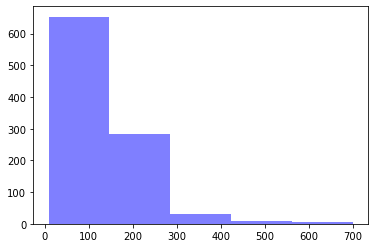

In [11]:
#plt.hist(df['Married'],bins=5,alpha=0.5,color='red')
plt.hist(df['LoanAmount'],bins=5,alpha=0.5,color='blue')
plt.show()

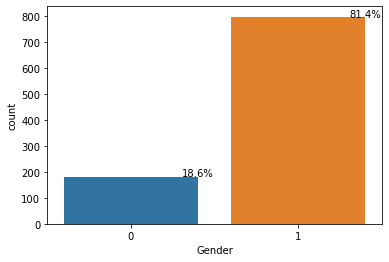

In [12]:
total=float(len(df))
gen_plot=sns.countplot(x='Gender',data=df)
for p in gen_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    gen_plot.annotate(percentage, (x, y),ha='center')
plt.show()



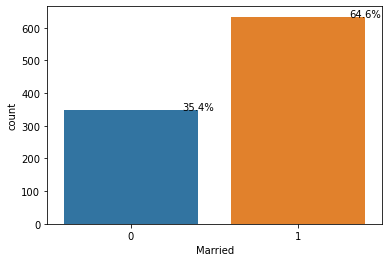

In [13]:
total=float(len(df))
marr_plot=sns.countplot(x='Married',data=df)
for p in marr_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    marr_plot.annotate(percentage, (x, y),ha='center')
plt.show()

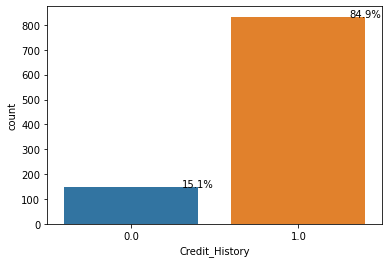

In [14]:
total=float(len(df))
cred_plot=sns.countplot(x='Credit_History',data=df)
for p in cred_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    cred_plot.annotate(percentage, (x, y),ha='center')
plt.show()

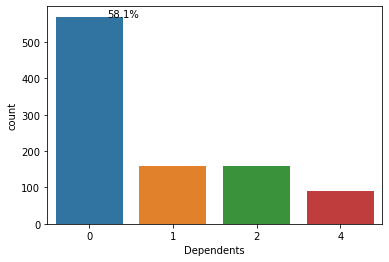

In [15]:
total=float(len(df))
dept_plot=sns.countplot(x='Dependents',data=df)
for p in dept_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dept_plot.annotate(percentage, (x, y),ha='center')
  
    plt.show()

D:\Anaconda_Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

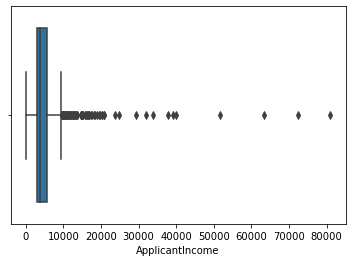

In [16]:
#outliers
sns.boxplot(df['ApplicantIncome'])
#plt.scatter(df.ApplicantIncome, df.Population, alpha=0.5)


Text(0.5, 0.98, '')

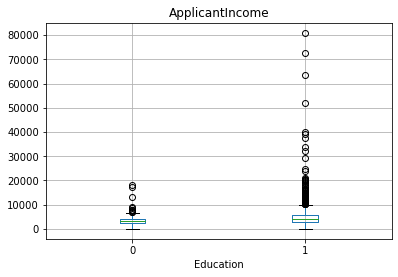

In [17]:
df.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

D:\Anaconda_Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


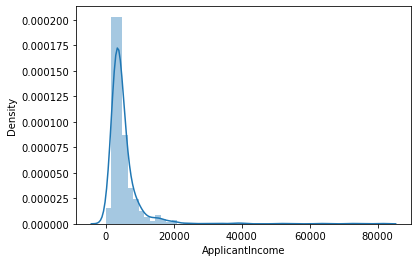

Text(0.5, 0.98, '')

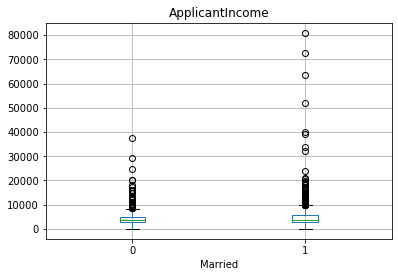

In [18]:
sns.distplot(df['ApplicantIncome'])
plt.show()
df.boxplot(column="ApplicantIncome",by="Married")
plt.suptitle("")

<AxesSubplot:>

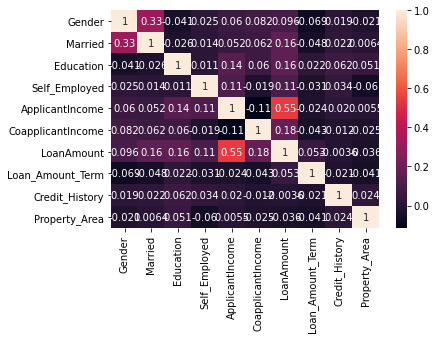

In [19]:
sns.heatmap(df.corr(),annot=True)

#loan amount and application income is related (0.55)

In [20]:
df['Loan_Status'].value_counts(normalize=True)

1    0.688073
0    0.311927
Name: Loan_Status, dtype: float64

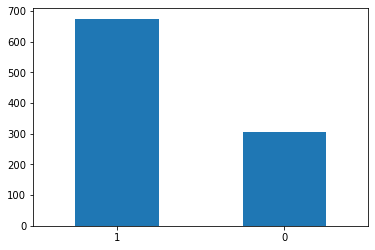

In [21]:
df['Loan_Status'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

In [22]:
df['LoanAmount'].value_counts(normalize=True)

120.00000    0.029562
110.00000    0.027523
142.51153    0.027523
100.00000    0.024465
187.00000    0.021407
               ...   
495.00000    0.001019
242.00000    0.001019
244.00000    0.001019
63.00000     0.001019
405.00000    0.001019
Name: LoanAmount, Length: 233, dtype: float64

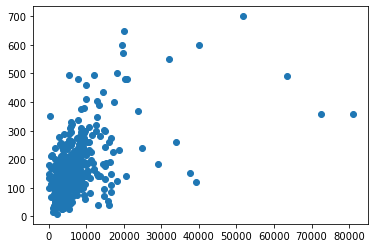

In [23]:
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'])
plt.show()

In [116]:
#df['ApplicantIncome'].value_counts(normalize=True)
#sns.distplot(df['ApplicantIncome'])

D:\Anaconda_Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

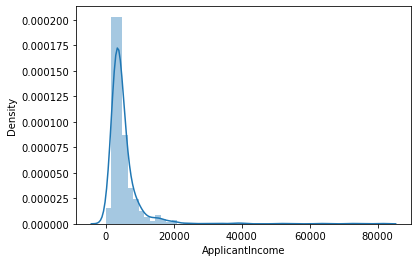

In [24]:
sns.distplot(df['ApplicantIncome'])

In [25]:
#X = df.drop(columns=['Loan_Status'],axis=1)
#Y = df['Loan_Status']
df.pop('Loan_ID')


0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
976    LP002978
977    LP002979
978    LP002983
979    LP002984
980    LP002990
Name: Loan_ID, Length: 981, dtype: object

In [26]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

y.value_counts()

1    675
0    306
Name: Loan_Status, dtype: int64

In [27]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,main_y)
y_ros.value_counts()

1    675
0    675
Name: Loan_Status, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)

print(X)
print(y)


     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          0          1              0             5720   
1         1        1          1          1              0             3076   
2         1        1          2          1              0             5000   
3         1        1          2          1              0             2340   
4         1        0          0          0              0             3276   
..      ...      ...        ...        ...            ...              ...   
976       0        0          0          1              0             2900   
977       1        1          4          1              0             4106   
978       1        1          1          1              0             8072   
979       1        1          2          1              0             7583   
980       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(X_train) # Training dataset

x_test = sc.transform(X_test) # validation dataset

# Actual test dataset on which final prediction is to be made
X_main_test_sc =  sc.transform(y_test) 

D:\Anaconda_Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(X_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [46]:

model.score(X_train,y_train)

0.6807580174927114

In [47]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf')

In [48]:
classifier.fit(X_train,y_train)

SVC()

In [49]:
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print(training_data_accuray)

0.6836734693877551


In [50]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)
print(test_data_accuray)

0.7016949152542373


In [51]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
df['Loan_Status'] = pd.to_numeric(df['Loan_Status'])

In [54]:
xgb.fit(X_train,y_train)



ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Dependents